# Interactive maps with Geoviews and Bokeh

- https://kodu.ut.ee/~kmoch/geopython2020/L6/interactive-map-bokeh.html

In [15]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [16]:
# Initialize the plot (p) and give it a title
p = figure(title="My first interactive plot!")


In [17]:
# Create a list of x-coordinates
x_coords = [0,1,2,3,4]

# Create a list of y-coordinates
y_coords = [5,4,1,2,0]

In [18]:
p.circle(x=x_coords, y=y_coords, size=10, color="red")

GlyphRenderer(id='3384', ...)

In [19]:
show(p)

In [20]:
import geopandas as gpd

# File path
points_fp = "schools_tartu.shp"

# Read the data
points = gpd.read_file(points_fp)

In [21]:
points.head()

id                                     name  \
0  13376                   Aakre Lasteaed-Algkool   
1  13290                       Alatskivi Lasteaed   
2  13396                 Anna Haava nim Pala Kool   
3  13202                          Elva Gümnaasium   
4  13298  Elva Huviala-ja Kultuurikeskus Sinilind   

                                             Aadress            X  \
0  Valga maakond, Puka vald, Aakre küla, Mõisa te...  629862.0000   
1  Tartu maakond, Alatskivi vald, Alatskivi alevi...  682186.9651   
2    Jõgeva maakond, Pala vald, Pala küla, Koolimaja  675030.0000   
3              Tartu maakond, Elva linn, Tartu mnt 3  641493.0000   
4               Tartu maakond, Elva linn, Kesk tn 30  641973.9625   

             y                        geometry  
0  6441779.000  POINT (629862.000 6441779.000)  
1  6499629.999  POINT (682186.965 6499629.999)  
2  6507478.000  POINT (675030.000 6507478.000)  
3  6456152.000  POINT (641493.000 6456152.000)  
4  6456196.951  POINT (641973.963 6456196.951)

In [22]:
def getPointCoords(row, geom, coord_type):
    """Calculates coordinates ('x' or 'y') of a Point geometry"""
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y

In [23]:
# Calculate x coordinates
points['x'] = points.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)

# Calculate y coordinates
points['y'] = points.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

# Let's see what we have now
points.head()

id                                     name  \
0  13376                   Aakre Lasteaed-Algkool   
1  13290                       Alatskivi Lasteaed   
2  13396                 Anna Haava nim Pala Kool   
3  13202                          Elva Gümnaasium   
4  13298  Elva Huviala-ja Kultuurikeskus Sinilind   

                                             Aadress            X  \
0  Valga maakond, Puka vald, Aakre küla, Mõisa te...  629862.0000   
1  Tartu maakond, Alatskivi vald, Alatskivi alevi...  682186.9651   
2    Jõgeva maakond, Pala vald, Pala küla, Koolimaja  675030.0000   
3              Tartu maakond, Elva linn, Tartu mnt 3  641493.0000   
4               Tartu maakond, Elva linn, Kesk tn 30  641973.9625   

             y                        geometry            x  
0  6441779.000  POINT (629862.000 6441779.000)  629862.0000  
1  6499629.999  POINT (682186.965 6499629.999)  682186.9651  
2  6507478.000  POINT (675030.000 6507478.000)  675030.0000  
3  6456152.000  POINT (641493.000 6456152.000)  641493.0000  
4  6456196.951  POINT (641973.963 6456196.951)  641973.9625

In [24]:
# Make a copy and drop the geometry column
p_df = points.drop('geometry', axis=1).copy()

# See head
p_df.head(2)

id                    name  \
0  13376  Aakre Lasteaed-Algkool   
1  13290      Alatskivi Lasteaed   

                                             Aadress            X  \
0  Valga maakond, Puka vald, Aakre küla, Mõisa te...  629862.0000   
1  Tartu maakond, Alatskivi vald, Alatskivi alevi...  682186.9651   

             y            x  
0  6441779.000  629862.0000  
1  6499629.999  682186.9651

In [25]:
from bokeh.models import ColumnDataSource

# Point DataSource
psource = ColumnDataSource(p_df)

In [26]:
psource

ColumnDataSource(id='3436', ...)

In [27]:
# Initialize our plot figure
p = figure(title="A map of school location points from a Shapefile")

# Add the points to the map from our 'psource' ColumnDataSource -object
p.circle('x', 'y', source=psource, color='red', size=10)

GlyphRenderer(id='3477', ...)

In [28]:
show(p)

In [29]:
from bokeh.models import HoverTool

In [30]:
my_hover = HoverTool()

In [31]:
my_hover.tooltips = [('Name of the School', '@name'), ('aadress', '@Aadress')]

In [32]:
p.add_tools(my_hover)

In [33]:
show(p)

In [34]:
import geopandas as gpd

# File path
roads_fp = "roads.shp"

# Read the data
roads = gpd.read_file(roads_fp)

In [35]:
roads.head()

TYYP                                           geometry
0  Kõrvalmaantee  LINESTRING (628395.967 6437374.941, 628230.700...
1  Kõrvalmaantee  LINESTRING (627016.000 6438859.770, 626942.160...
2  Kõrvalmaantee  LINESTRING (630462.518 6439009.709, 630496.794...
3    Põhimaantee  LINESTRING (630059.642 6438844.378, 630092.690...
4  Kõrvalmaantee  LINESTRING (630092.690 6439015.520, 630462.518...

In [36]:
from shapely.geometry import LineString, MultiLineString

def getLineCoords(row, geom, coord_type):
    if isinstance(row[geom], MultiLineString):
        empty_l = []
        return empty_l
    else:
        if coord_type == 'x':
            return list( row[geom].coords.xy[0] )
        elif coord_type == 'y':
            return list( row[geom].coords.xy[1] )

In [37]:
# Calculate x coordinates of the line
roads['x'] = roads.apply(getLineCoords, geom='geometry', coord_type='x', axis=1)

# Calculate y coordinates of the line
roads['y'] = roads.apply(getLineCoords, geom='geometry', coord_type='y', axis=1)

# Let's see what we have now
roads.head()

TYYP                                           geometry  \
0  Kõrvalmaantee  LINESTRING (628395.967 6437374.941, 628230.700...   
1  Kõrvalmaantee  LINESTRING (627016.000 6438859.770, 626942.160...   
2  Kõrvalmaantee  LINESTRING (630462.518 6439009.709, 630496.794...   
3    Põhimaantee  LINESTRING (630059.642 6438844.378, 630092.690...   
4  Kõrvalmaantee  LINESTRING (630092.690 6439015.520, 630462.518...   

                                                   x  \
0  [628395.967023925, 628230.7000000704, 628170.1...   
1              [627016.0000000595, 626942.160000056]   
2             [630462.5180000596, 630496.7935589477]   
3              [630059.6421779364, 630092.690000058]   
4              [630092.690000058, 630462.5180000596]   

                                                   y  
0  [6437374.940890101, 6437599.020451155, 6437663...  
1              [6438859.770451147, 6438884.15045115]  
2             [6439009.709451153, 6438938.423092961]  
3             [6438844.378158718, 6439015.520451145]  
4             [6439015.520451145, 6439009.709451153]

In [38]:
# Make a copy and drop the geometry column
m_df = roads.drop('geometry', axis=1).copy()

# Point DataSource
msource = ColumnDataSource(m_df)

In [39]:
# Initialize our plot figure
p = figure(title="A map of Tartumaa Roads")

# Add the lines to the map from our 'msource' ColumnDataSource -object
p.multi_line('x', 'y', source=msource, color='red', line_width=3)

GlyphRenderer(id='3632', ...)

In [40]:
show(p)

In [41]:
road_hover = HoverTool()
road_hover.tooltips = [('Road type', '@TYYP')]
p.add_tools(road_hover)
show(p)

In [42]:
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper
import geopandas as gpd

grid_fp = "population_square_km.shp"
roads_fp = "roads.shp"
schools_fp = "schools_tartu.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
schools = gpd.read_file(schools_fp)

In [43]:
# Get the CRS of our grid
CRS = grid.crs
print(CRS)

# Convert the geometries of roads line and schools into that one
schools['geometry'] = schools['geometry'].to_crs(crs=CRS)
roads['geometry'] = roads['geometry'].to_crs(crs=CRS)

epsg:3301


In [44]:
print(schools['geometry'].head(1))
print(roads['geometry'].head(1))
print(grid['geometry'].head(1))

0    POINT (629862.000 6441779.000)
Name: geometry, dtype: geometry
0    LINESTRING (628395.967 6437374.941, 628230.700...
Name: geometry, dtype: geometry
0    POLYGON ((625000.000 6433000.000, 624000.000 6...
Name: geometry, dtype: geometry


In [45]:
def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""
    # Parse the exterior of the coordinate
    exterior = row[geom].exterior
    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )

In [46]:
# Get the Polygon x and y coordinates
grid['x'] = grid.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
grid['y'] = grid.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

# Calculate x and y coordinates of the line
roads['x'] = roads.apply(getLineCoords, geom='geometry', coord_type='x', axis=1)
roads['y'] = roads.apply(getLineCoords, geom='geometry', coord_type='y', axis=1)

# Calculate x and y coordinates of the schools
schools['x'] = schools.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
schools['y'] = schools.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

In [47]:
grid[['x', 'y']].head(2)

x  \
0  [625000.0000000006, 624000.000000004, 624000.0...   
1  [622999.9999999993, 622000.0000000027, 622000....   

                                                   y  
0  [6432999.999999995, 6432999.999999995, 6434000...  
1  [6434000.0, 6434000.0, 6434999.999999996, 6434...

In [48]:
import pysal.viz.mapclassify as mc
# Initialize the classifier and apply it
classifier = mc.Quantiles.make(k=5)
grid['pop_km2'] = grid[['Population']].apply(classifier)
# What do we have now?
grid.head(2)

STAMP_CRE  Population                                           geometry  \
0  1899-12-30           0  POLYGON ((625000.000 6433000.000, 624000.000 6...   
1  1899-12-30           0  POLYGON ((623000.000 6434000.000, 622000.000 6...   

                                                   x  \
0  [625000.0000000006, 624000.000000004, 624000.0...   
1  [622999.9999999993, 622000.0000000027, 622000....   

                                                   y  pop_km2  
0  [6432999.999999995, 6432999.999999995, 6434000...        0  
1  [6434000.0, 6434000.0, 6434999.999999996, 6434...        0

In [49]:
# Make a copy, drop the geometry column and create ColumnDataSource
m_df = roads.drop('geometry', axis=1).copy()
msource = ColumnDataSource(m_df)

# Make a copy, drop the geometry column and create ColumnDataSource
p_df = schools.drop('geometry', axis=1).copy()
psource = ColumnDataSource(p_df)

# Make a copy, drop the geometry column and create ColumnDataSource
g_df = grid.drop('geometry', axis=1).copy()
gsource = ColumnDataSource(g_df)

In [50]:
# Let's first do some coloring magic that converts the color palet into map numbers (it's okey not to understand)
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper

# Create the color mapper
color_mapper = LogColorMapper(palette=palette)

In [51]:
# Initialize our figure
p = figure(title="Population per km2 compared to Road network in Tartu")

# Plot grid
p.patches('x', 'y', source=gsource,
         fill_color={'field': 'pop_km2', 'transform': color_mapper},
         fill_alpha=1.0, line_color="black", line_width=0.05)

# Add roads on top of the same figure
p.multi_line('x', 'y', source=msource, color="grey", line_width=2)

# Add schools on top (as yellow points)
p.circle('x', 'y', size=3, source=psource, color="yellow")

# let's also add the hover over info tool
tooltip = HoverTool()
tooltip.tooltips = [('Name  of the school', '@name'),
                    ('Type of road', '@TYYP'),
                    ('Population density', '@Population')]
p.add_tools(tooltip)

In [52]:
show(p)

In [53]:
# Convert the geometries
grid_proj = grid.to_crs(epsg=3857)
schools_proj = schools.to_crs(epsg=3857)
roads_proj = roads.to_crs(epsg=3857)

# Get the Polygon x and y coordinates
grid_proj['x'] = grid_proj.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
grid_proj['y'] = grid_proj.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

# Calculate x and y coordinates of the line
roads_proj['x'] = roads_proj.apply(getLineCoords, geom='geometry', coord_type='x', axis=1)
roads_proj['y'] = roads_proj.apply(getLineCoords, geom='geometry', coord_type='y', axis=1)

# Calculate x and y coordinates of the schools
schools_proj['x'] = schools_proj.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
schools_proj['y'] = schools_proj.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

In [54]:
# Make a copy, drop the geometry column and create ColumnDataSource
grid_proj = grid_proj.drop('geometry', axis=1).copy()
grid_proj_source = ColumnDataSource(grid_proj)

# Make a copy, drop the geometry column and create ColumnDataSource
roads_proj = roads_proj.drop('geometry', axis=1).copy()
roads_proj_source = ColumnDataSource(roads_proj)

# Make a copy, drop the geometry column and create ColumnDataSource
schools_proj = schools_proj.drop('geometry', axis=1).copy()
schools_proj_source = ColumnDataSource(schools_proj)

In [55]:
from bokeh.tile_providers import get_provider, Vendors

from bokeh.palettes import RdPu9
from bokeh.models import LinearColorMapper, BasicTicker, ColorBar, Legend, LegendItem

# Initialize our figure
p = figure(title="Population per km2 compared to Road network in Tartu",
           x_range=(2899000,3065000), y_range=(7980000,8140000),
           x_axis_type="mercator", y_axis_type="mercator")


# instatiate the tile source provider
tile_provider = get_provider(Vendors.CARTODBPOSITRON)

# add the back ground basemap
p.add_tile(tile_provider)

# instantiate a new colormapper
color_mapper_v = LinearColorMapper(palette=RdPu9,
                                low=grid_proj['pop_km2'].min(),
                                high=grid_proj['pop_km2'].max())

# Plot grid
p.patches('x', 'y', source=grid_proj_source,
         fill_color={'field': 'pop_km2', 'transform': color_mapper_v},
         fill_alpha=0.7, line_color="black", line_width=0.05)

# build a legend scale for the grid population classes
color_bar = ColorBar(color_mapper=color_mapper_v, ticker=BasicTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

# and add this additional legend scale bar to the plot
p.add_layout(color_bar, 'right')

# Add roads on top of the same figure
p.multi_line('x', 'y', source=roads_proj_source, color="grey", line_width=2)

# Add schools on top (as yellow points)
p.circle('x', 'y', size=3, source=schools_proj_source, color="yellow")

# now let's develop a custom legend for our 3 active layers
# the first rendered layer (p.renderers[0]) is the TileRenderer of our background map!
# here we link the rendered layer to a legend item
li1 = LegendItem(label='Pop Km2 Grid', renderers=[p.renderers[1]])
li2 = LegendItem(label='Roads', renderers=[p.renderers[2]])
li3 = LegendItem(label='Schools', renderers=[p.renderers[3]])

# then we put them together into an actual legend and place it on the plot
legend1 = Legend(items=[li1, li2, li3], location='top_right')
p.add_layout(legend1)

# we can even make this interactive and de-/activate layers
p.legend.click_policy="hide"

# let's also add the hover over info tool
tooltip = HoverTool()

tooltip.tooltips = [('Name  of the school', '@name'),
                    ('Type of road', '@TYYP')]
p.add_tools(tooltip)


show(p)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
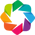

In [56]:
import pandas as pd
import geopandas as gpd
import geoviews as gv
import geoviews.feature as gf

from geoviews import opts
from geoviews import tile_sources as gvts
from cartopy import crs

gv.extension('bokeh')
gv.output(fig='html', size=300)

import warnings
warnings.filterwarnings('ignore')

### global earth plots

In [2]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


In [11]:
img = ( gf.ocean * 
     gf.coastline * 
     gf.land * 
     gv.Polygons(countries, vdims=['gdp_md_est']).opts(colorbar=True, cmap='seismic', tools=['hover'], toolbar='above', projection=crs.Mollweide(), xaxis=None, yaxis=None) * 
     gv.Points(cities, vdims=['name']).opts(tools=['hover'], toolbar='above', colorbar=False, width=400) )

In [12]:
img

:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]   (gdp_md_est)
   .Points.I    :Points   [Longitude,Latitude]   (name)

In [13]:
gv.save(img, 'world.html')

## like above

In [57]:
grid84 = grid.to_crs(4326)

roads84 = roads.to_crs(4326)

schools84 = schools.to_crs(4326)

In [65]:
tiles = gvts.CartoDark

In [66]:
shapes = []

for idx, row in roads84.iterrows():
    shapes.append( gv.Shape(row['geometry']).opts(color='black') )

In [67]:
tiles * gv.Points(schools84, vdims=['name'] ).opts(color='cyan', tools=['hover'], toolbar='above', colorbar=False, projection=crs.GOOGLE_MERCATOR)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (name)